# **Analysis of customer aggregation dataset using UNSUPERVISED methods**
## by AFZAL QURESHI

    Unsupervised models used:
        K-means
        DBSCAN
        Agglomerative (hierarchical)

    Scores used for evaluating:
        Silhouette score: Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a
                           clustering technique. 
                           
                           Its value ranges from -1 to 1.                       
                           1: Means clusters are well apart from each other and clearly distinguished.
                           0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.
                          -1: Means clusters are assigned in the wrong way.
                          
                          Silhouette Score = (b-a)/max(a,b)
                          where
                          a= average intra-cluster distance i.e the average distance between each point within a cluster.
                          b= average inter-cluster distance i.e the average distance between all clusters.
                          
        Calinski Harabasz score:The Calinski-Harabasz index (also known as the Variance Ratio Criterion) is calculated
                                as a ratio of the sum of inter-cluster dispersion and the sum of intra-cluster dispersion
                                for all clusters (where the dispersion is the sum of squared distances). 
                                
                                A high CH means better clustering since observations in each cluster are closer together 
                                (more dense), while clusters themselves are further away from each other (well separated).
                                
                                The Calinski-Harabasz index is calculated as:

                                       BGSS/(K-1)      BGSS*(N−K)
                               CH =   ------------ =  ------------
                                       WGSS/(N−K)      WGSS*(K−1)

                                where:
                                    BGSS : between-group sum of squares (between-group dispersion)
                                    WGSS : within-group sum of squares (within-group dispersion)
                                    N : total number of observations
                                    K : total number of clusters
                                

# Import various libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, silhouette_samples, calinski_harabasz_score

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

import matplotlib.cm as cm
import matplotlib.style as style
style.use("seaborn-darkgrid")

# Loading data

In [2]:
df=pd.read_csv('shopping_data.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# **Using whole dataset**
### Earlier we used only 2 features 'Annual Income (k$)' , 'Spending Score (1-100)' columns for simple visualisations
### Lets use 'age' and 'gender' features as well this time 

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Dropping high variance columns like CustomerID

In [6]:
df.drop(columns='CustomerID', axis=1, inplace=True)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


### Encoding gender column

In [7]:
df['Gender_enc']= (df.Gender=='Male').astype('int8')

In [8]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_enc
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,0


# Visualisations

### 3D plot

scaling data for 3D plot

In [9]:
# initialising minmax scaler
scaler_MM=MinMaxScaler()

#scaling data and separating based on gender to give hue to plots
X=scaler_MM.fit_transform( df.drop(columns=['Gender'], axis=1) )
X_male=X[X[:,3]==1]
X_female=X[X[:,3]==0]


plotting

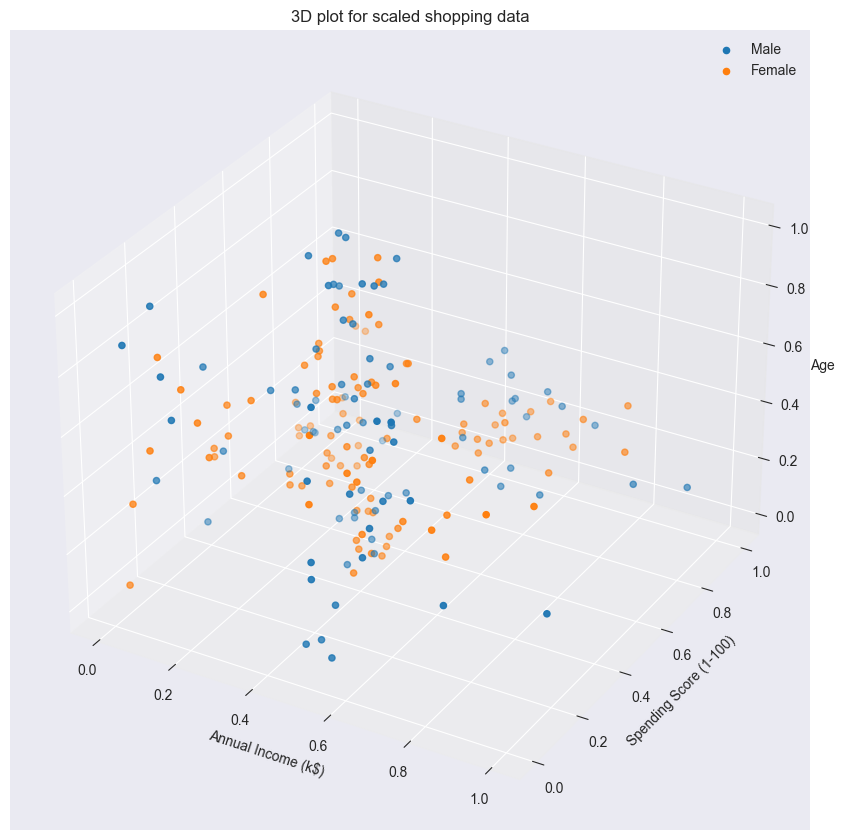

In [10]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,8), dpi=100)
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

gender_dict={'Male':X_male, 'Female':X_female}

# creating the plot
for label, X in gender_dict.items():
    ax.scatter(X[:,1], X[:,2], X[:,0], label=label)

# setting title and labels
ax.set_title("3D plot for scaled shopping data")
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Age')
ax.legend()

plt.show()

### **looks like there are atleast 3 clusters**

    3d plot is all over the place
    doesnt seem to give much information so lets try with 2D plots  

### plotting correlation between features

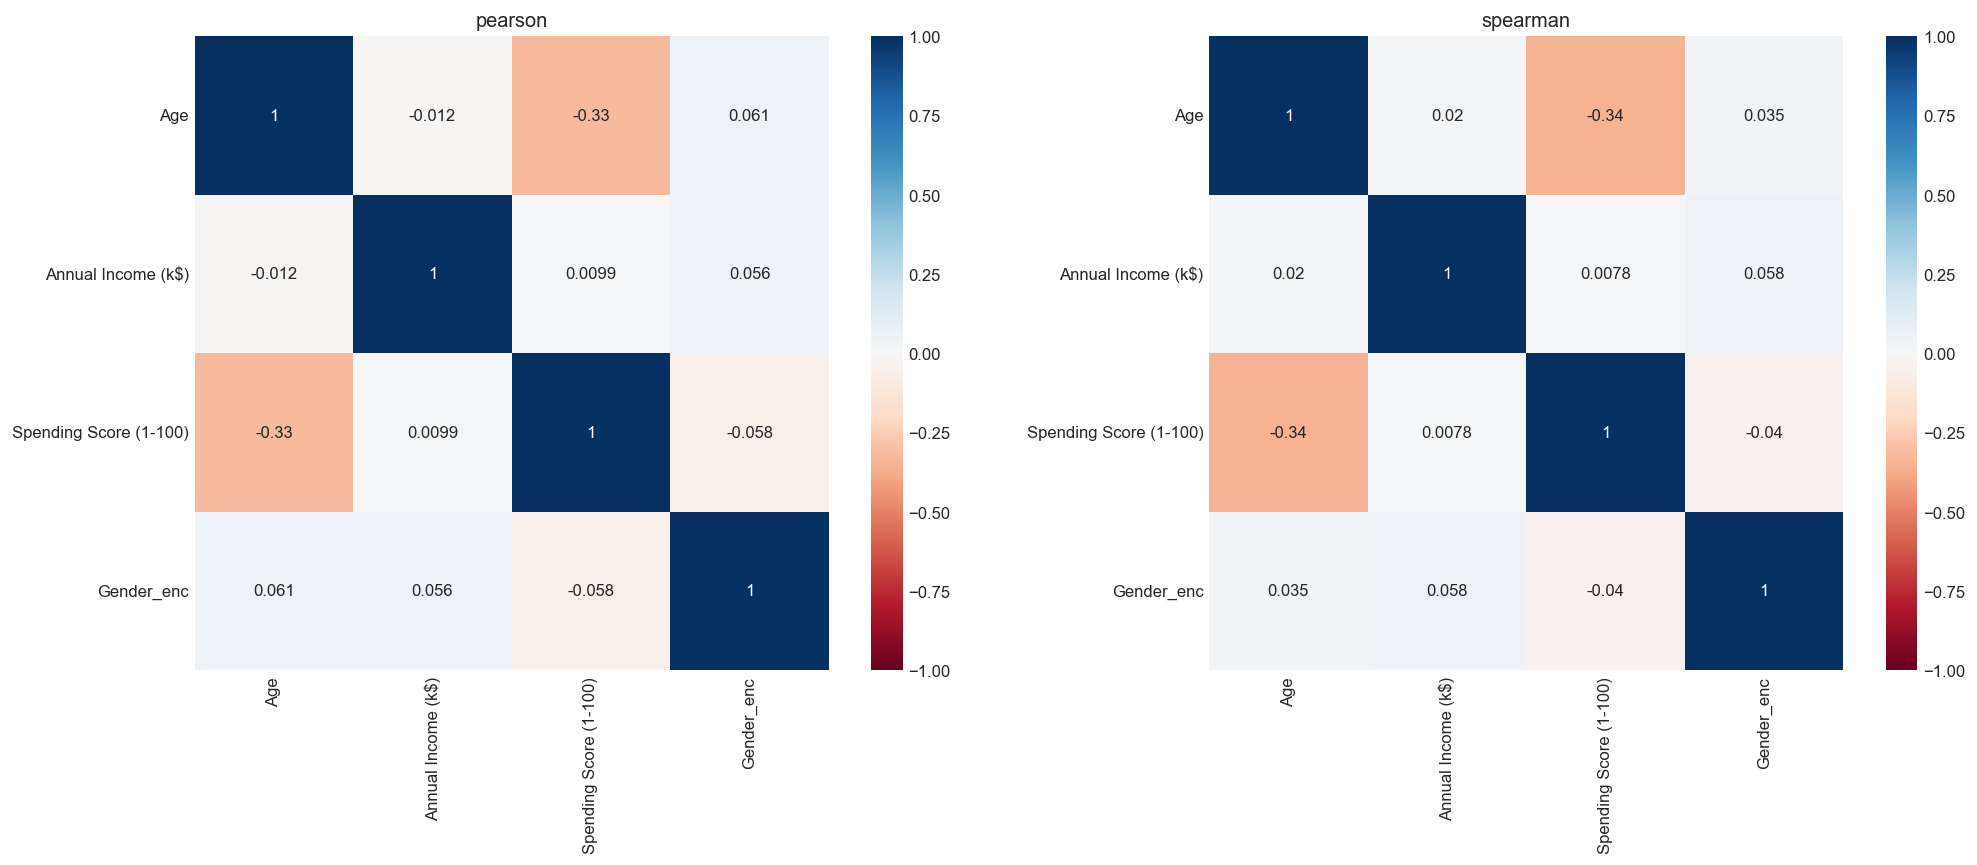

In [11]:
####################################
''' IMPORTING FROM CUSTOM MODULE '''
####################################
from quick_EDA import correlation

correlation(df, figsize=(20,7), dpi=120)

### **seems like there is no significant correlation between the features** 

### scatterplot to see any other pattern

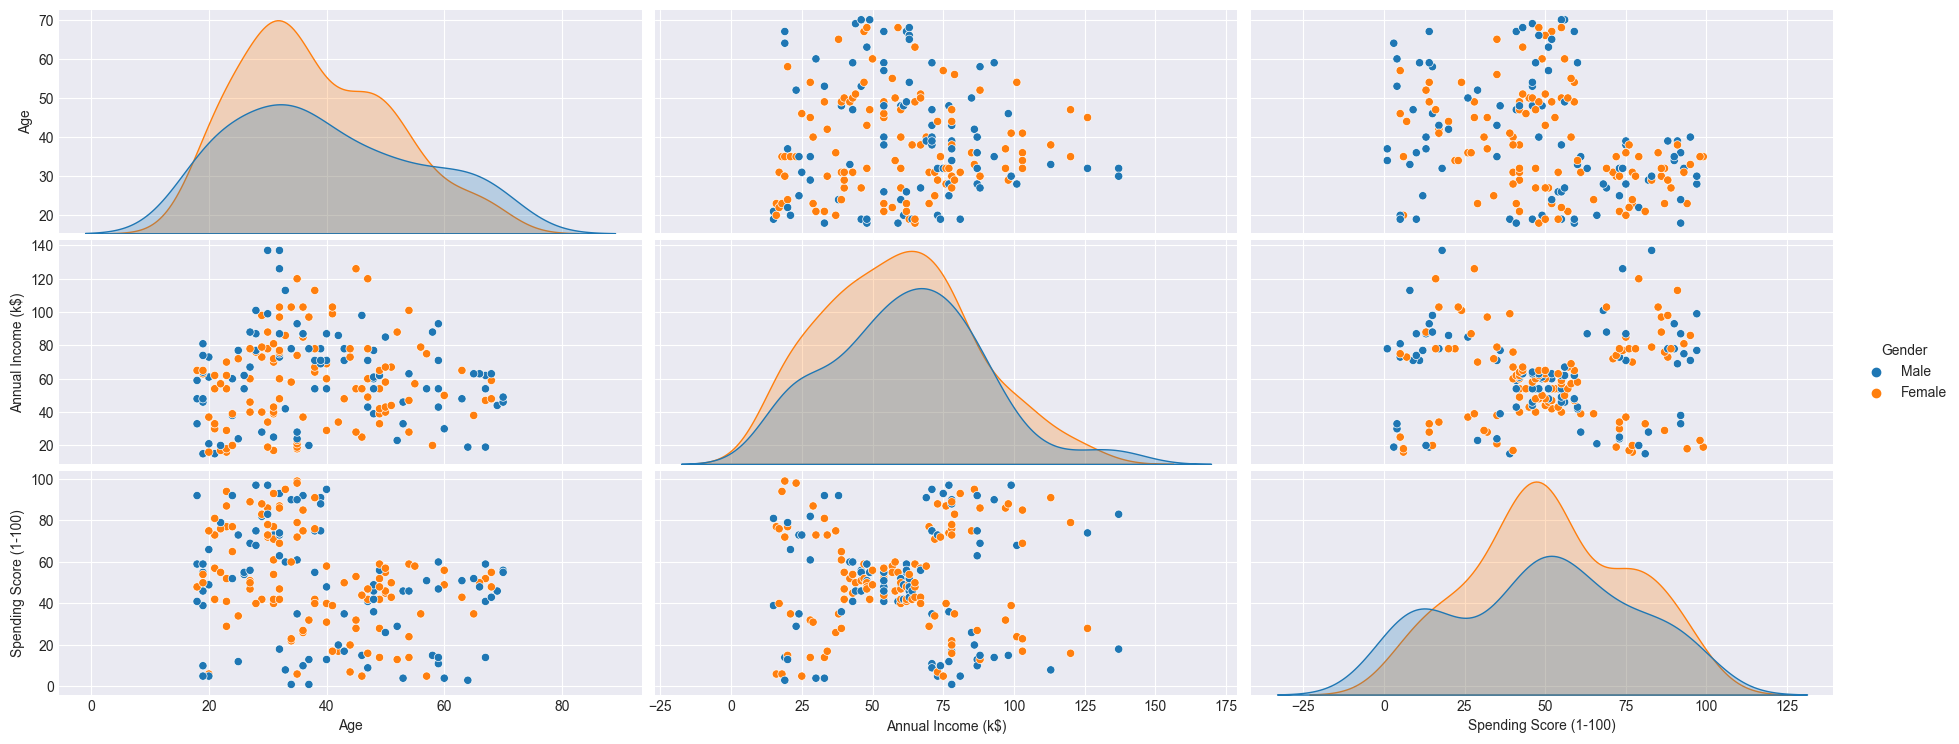

In [12]:
plot=sns.pairplot(
    data=df.drop('Gender_enc', axis=1),
    hue='Gender',
    height=2.5, aspect=2.5
)

plot.fig.set_dpi(100)
plt.show()

### **Annual Income vs spending score seems to show more separation between data so lets set them as base axes**
    setting the hue as gender 
    setting the size of data point in proportion to age 

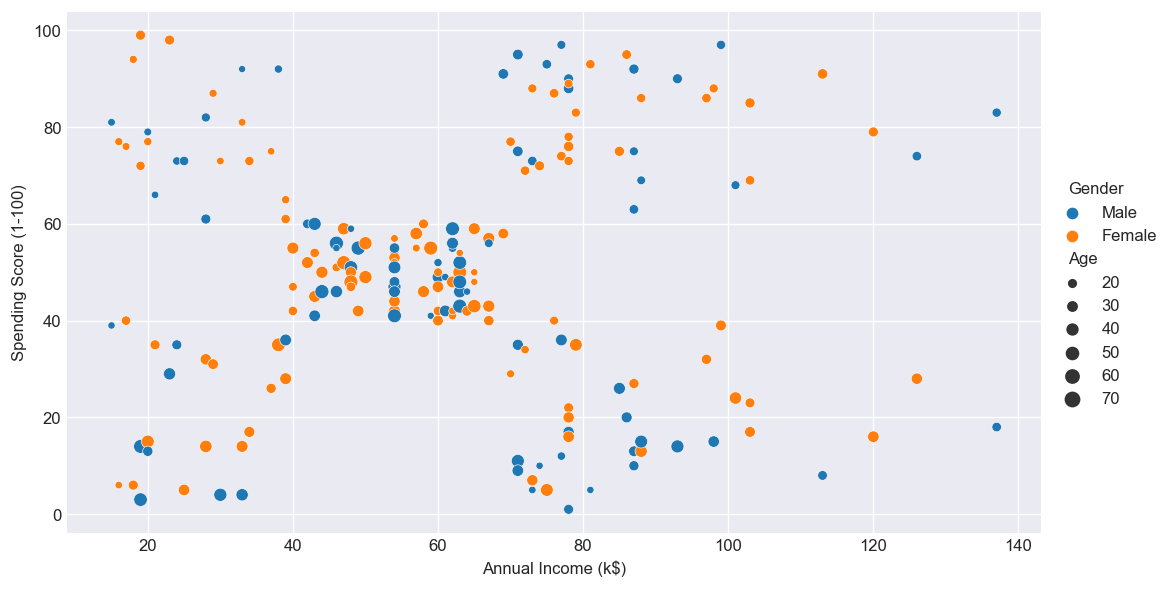

In [13]:
# giving hue as gender_enc column and size as age column
plot=sns.relplot(
    data=df.drop('Gender_enc', axis=1),
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Gender',
    size='Age',
    height=5, aspect=16/9
)

plot.fig.set_dpi(120)
plt.show()

### **Youngsters seem to have high spending score whereas elderly people have medium to low**

# using Kmeans

### creating scaled data

In [14]:
X=scaler_MM.fit_transform(df.drop(columns=['Gender'], axis=1))
X[:5]

array([[0.01923077, 0.        , 0.3877551 , 1.        ],
       [0.05769231, 0.        , 0.81632653, 1.        ],
       [0.03846154, 0.00819672, 0.05102041, 0.        ],
       [0.09615385, 0.00819672, 0.7755102 , 0.        ],
       [0.25      , 0.01639344, 0.39795918, 0.        ]])

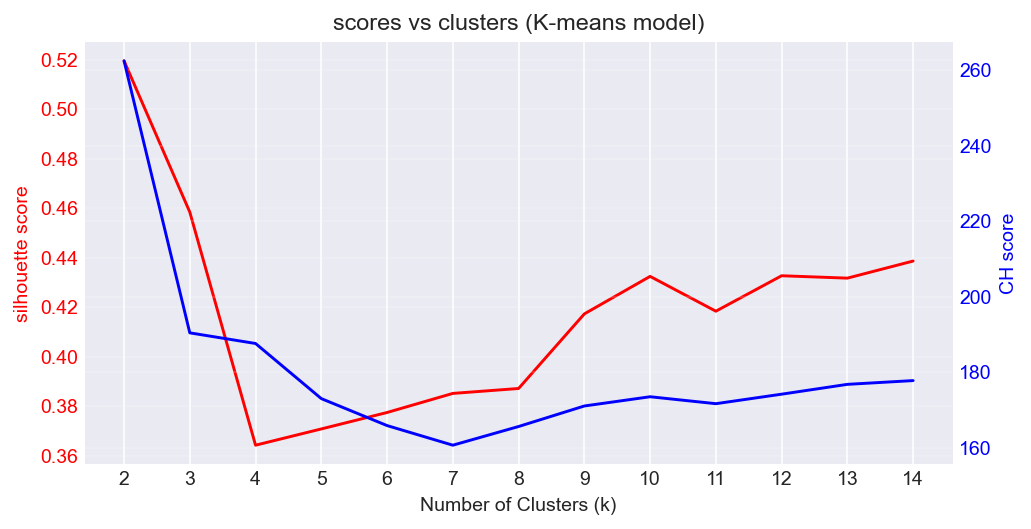

In [15]:
score_sil=np.array([])
score_CH=np.array([])

clusters=np.arange(2,15)
for K in clusters:
    
    model_km=KMeans(n_clusters=K).fit(X)
    labels=model_km.labels_
    
    score_sil=np.append(score_sil, silhouette_score(X, labels))
    score_CH=np.append(score_CH, calinski_harabasz_score(X, labels))

fig,ax=plt.subplots(figsize=(8,4), dpi=140)

# plotting silhouette score
ax.plot(clusters, score_sil, c='red' )
ax.set_xlabel('Number of Clusters (k)')
ax.set_ylabel('silhouette score', c='red')
ax.set_xticks(clusters)
ax.tick_params(axis='y', color='red', labelcolor='red')
ax.yaxis.grid(alpha=0.2)

# plotting CH score on twin axis
ax1=ax.twinx()
ax1.plot(clusters, score_CH, c='blue' )
ax1.set_ylabel('CH score', c='blue')
ax1.tick_params(axis='y', color='blue', labelcolor='blue')
ax1.yaxis.grid(alpha=0.2)

plt.title('scores vs clusters (K-means model)')
plt.show()


### *Result:cluster size of 2 seems best*

### clustering while excluding 'Gender_enc'

In [16]:
X_without_gender=scaler_MM.fit_transform(df.drop(columns=['Gender','Gender_enc'], axis=1))
X_without_gender[:5]

array([[0.01923077, 0.        , 0.3877551 ],
       [0.05769231, 0.        , 0.81632653],
       [0.03846154, 0.00819672, 0.05102041],
       [0.09615385, 0.00819672, 0.7755102 ],
       [0.25      , 0.01639344, 0.39795918]])

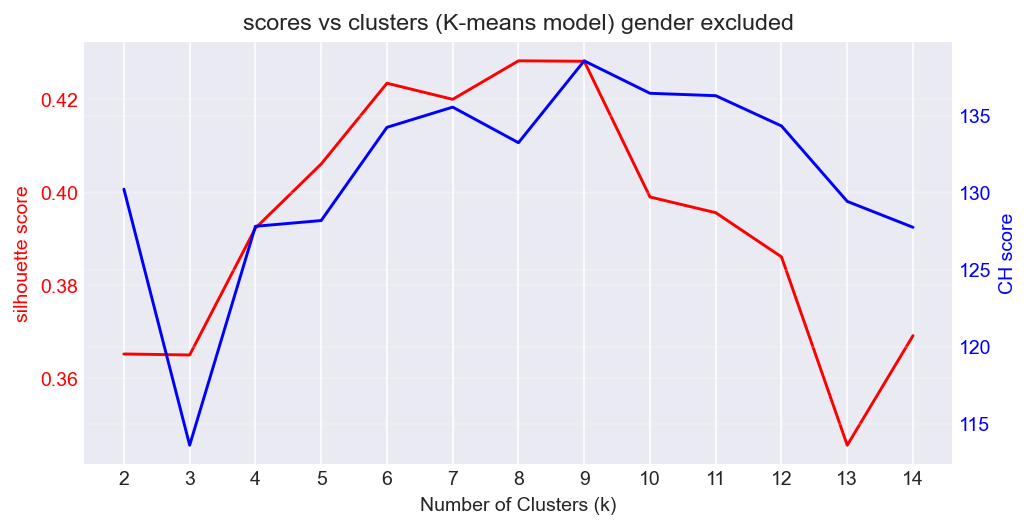

In [17]:
score_sil=np.array([])
score_CH=np.array([])

clusters=np.arange(2,15)
for K in clusters:
    
    model_km=KMeans(n_clusters=K).fit(X_without_gender)
    labels=model_km.labels_
    
    score_sil=np.append(score_sil, silhouette_score(X_without_gender, labels))
    score_CH=np.append(score_CH, calinski_harabasz_score(X_without_gender, labels))

fig,ax=plt.subplots(figsize=(8,4), dpi=140)

# plotting silhouette score
ax.plot(clusters, score_sil, c='red' )
ax.set_xlabel('Number of Clusters (k)')
ax.set_ylabel('silhouette score', c='red')
ax.set_xticks(clusters)
ax.tick_params(axis='y', color='red', labelcolor='red')
ax.yaxis.grid(alpha=0.2)

# plotting CH score on twin axis
ax1=ax.twinx()
ax1.plot(clusters, score_CH, c='blue' )
ax1.set_ylabel('CH score', c='blue')
ax1.tick_params(axis='y', color='blue', labelcolor='blue')
ax1.yaxis.grid(alpha=0.2)

plt.title('scores vs clusters (K-means model) gender excluded')
plt.show()


### *Result: now cluster size of 9 seems best*

# using Agglomerative(cluster based)
    since distance threshold based agglomerative clustering gave inconsistent results,
    I am using cluster based model

### creating scaled data

In [18]:
X=scaler_MM.fit_transform(df.drop(columns=['Gender'], axis=1))
X[:5]

array([[0.01923077, 0.        , 0.3877551 , 1.        ],
       [0.05769231, 0.        , 0.81632653, 1.        ],
       [0.03846154, 0.00819672, 0.05102041, 0.        ],
       [0.09615385, 0.00819672, 0.7755102 , 0.        ],
       [0.25      , 0.01639344, 0.39795918, 0.        ]])

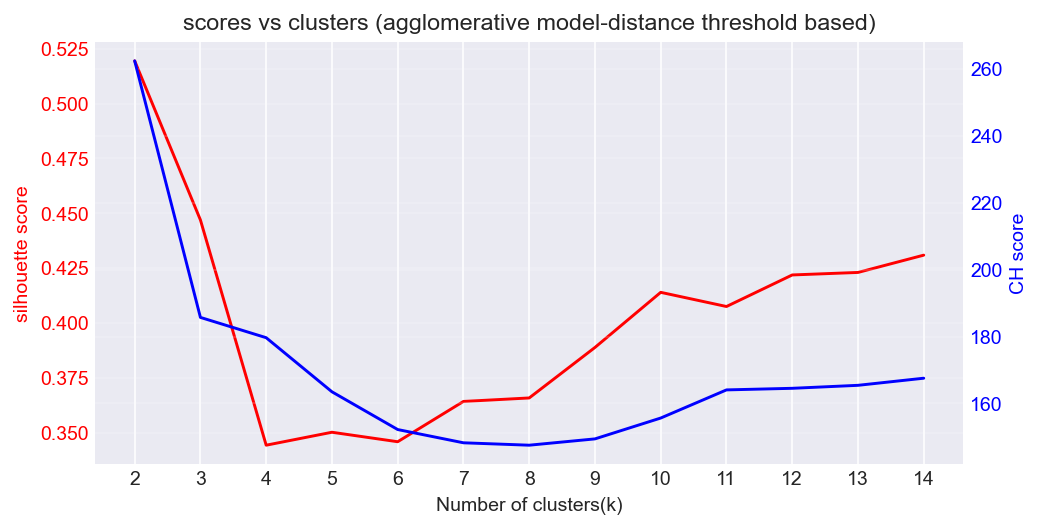

In [19]:
score_sil=np.array([])
score_CH=np.array([])

clusters=np.arange(2,15)
for K in clusters:
    
    model_agg=AgglomerativeClustering(n_clusters=K).fit(X)
    labels=model_agg.labels_

    score_sil=np.append(score_sil, silhouette_score(X, labels))
    score_CH=np.append(score_CH, calinski_harabasz_score(X, labels))

fig, ax= plt.subplots(figsize=(8,4), dpi=140)

# plotting silhouette score
ax.plot(clusters, score_sil, c='red' )
ax.set_xlabel('Number of clusters(k)')
ax.set_xticks(np.arange(0,21))
ax.set_ylabel('silhouette score', c='red')
ax.tick_params(axis='y', color='red', labelcolor='red')
ax.yaxis.grid(alpha=0.2)

# plotting CH score on twin axis
ax1=ax.twinx()
ax1.plot(clusters, score_CH, c='blue' )
ax1.set_ylabel('CH score', c='blue')
ax1.tick_params(axis='y', color='blue', labelcolor='blue')
ax1.yaxis.grid(alpha=0.2)

plt.title('scores vs clusters (agglomerative model-distance threshold based)')
plt.show()

### *Result:cluster size of 2 seems best*

### clustering while excluding 'Gender_enc'

In [20]:
X_without_gender=scaler_MM.fit_transform(df.drop(columns=['Gender','Gender_enc'], axis=1))
X_without_gender[:5]

array([[0.01923077, 0.        , 0.3877551 ],
       [0.05769231, 0.        , 0.81632653],
       [0.03846154, 0.00819672, 0.05102041],
       [0.09615385, 0.00819672, 0.7755102 ],
       [0.25      , 0.01639344, 0.39795918]])

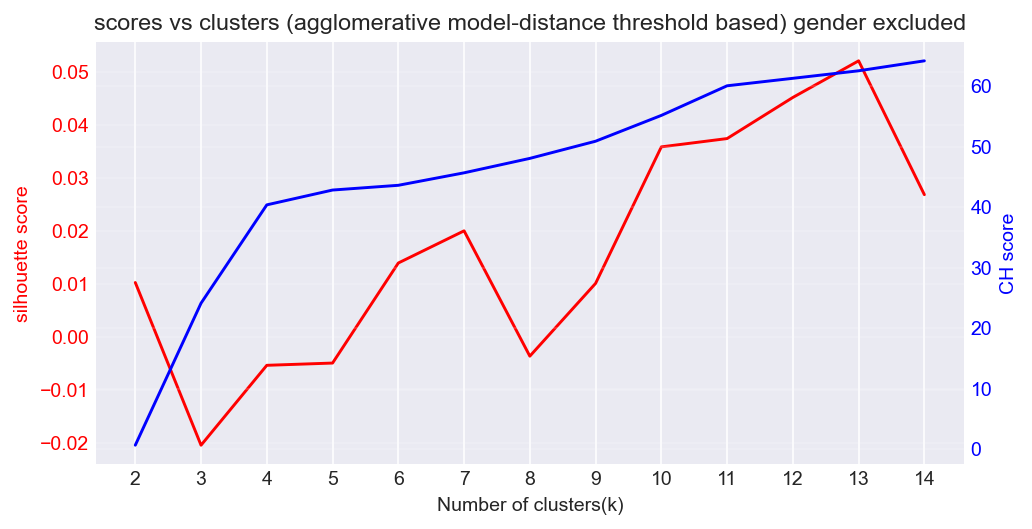

In [21]:
score_sil=np.array([])
score_CH=np.array([])

clusters=np.arange(2,15)
for K in clusters:
    
    model_agg=AgglomerativeClustering(n_clusters=K).fit(X)
    labels=model_agg.labels_
    
    score_sil=np.append(score_sil, silhouette_score(X_without_gender, labels))
    score_CH=np.append(score_CH, calinski_harabasz_score(X_without_gender, labels))

fig, ax= plt.subplots(figsize=(8,4), dpi=140)

# plotting silhouette score
ax.plot(clusters, score_sil, c='red' )
ax.set_xlabel('Number of clusters(k)')
ax.set_xticks(np.arange(0,21))
ax.set_ylabel('silhouette score', c='red')
ax.tick_params(axis='y', color='red', labelcolor='red')
ax.yaxis.grid(alpha=0.2)

# plotting CH score on twin axis
ax1=ax.twinx()
ax1.plot(clusters, score_CH, c='blue' )
ax1.set_ylabel('CH score', c='blue')
ax1.tick_params(axis='y', color='blue', labelcolor='blue')
ax1.yaxis.grid(alpha=0.2)

plt.title('scores vs clusters (agglomerative model-distance threshold based) gender excluded')
plt.show()

### *Result: now cluster size of 13 seems best*

# Conclusion:
### **clustering while including the 'Gender_enc' feature seems to give cluster size of 2**
### **clustering without 'Gender_enc' feature seems to give cluster size of 9 to 14**
### Hence domain knowledge can be applied for better labelling